In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df['num_passengers'].unique()

array([2, 1, 3, 4, 6, 5, 7, 9, 8])

In [ ]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [ ]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [ ]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [ ]:
len(df['booking_origin'].unique())

104

In [ ]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Print the result
print(null_counts)


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


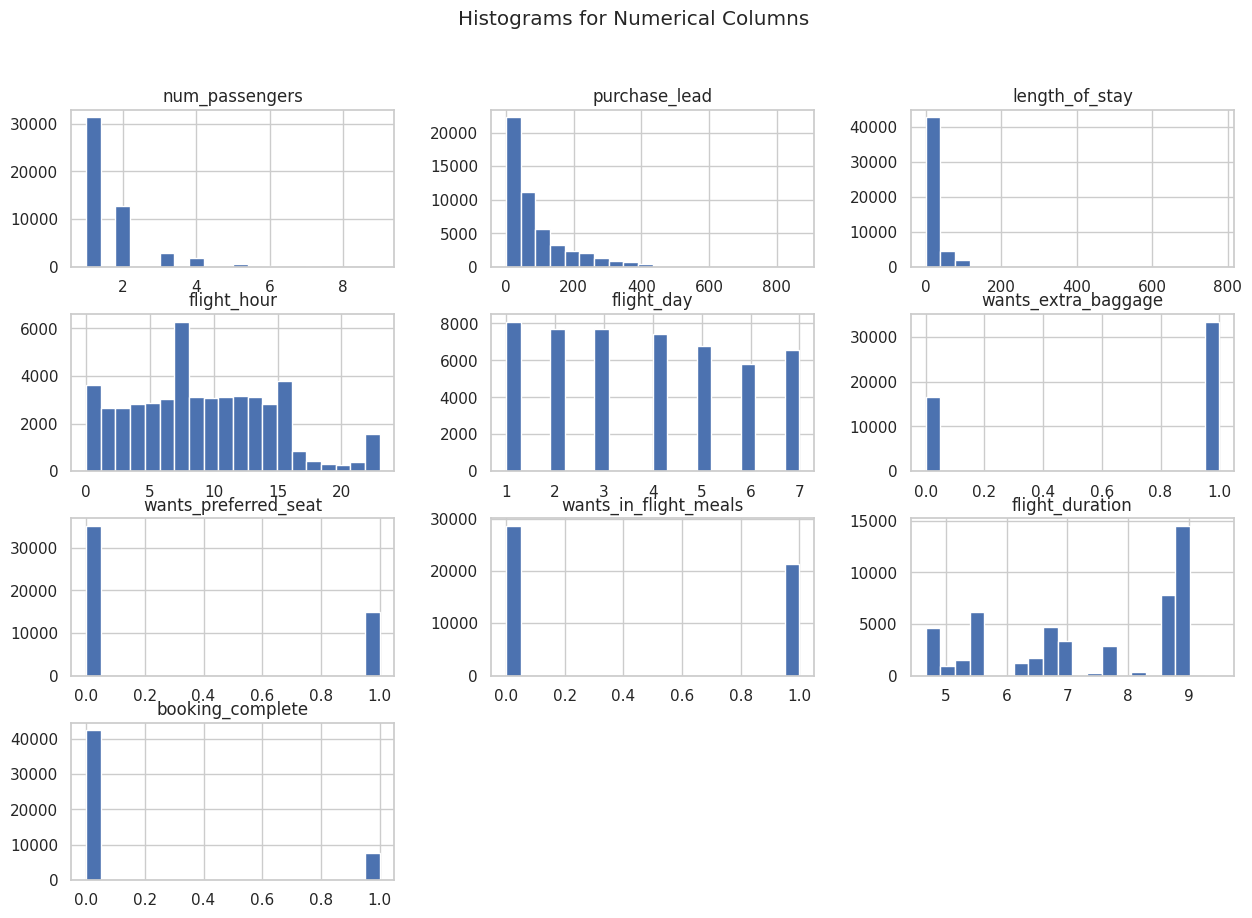

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms for Numerical Columns")
plt.show()


<ipython-input-17-5f29aee1f22c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


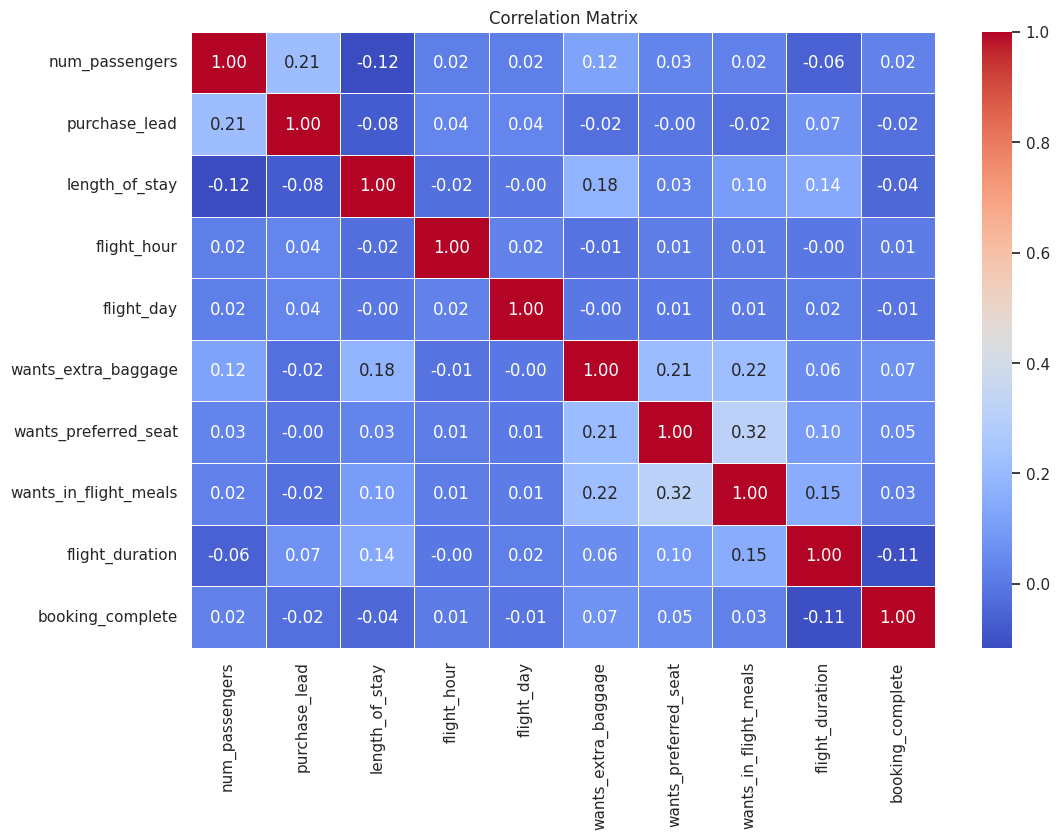

In [ ]:
# Plot a correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


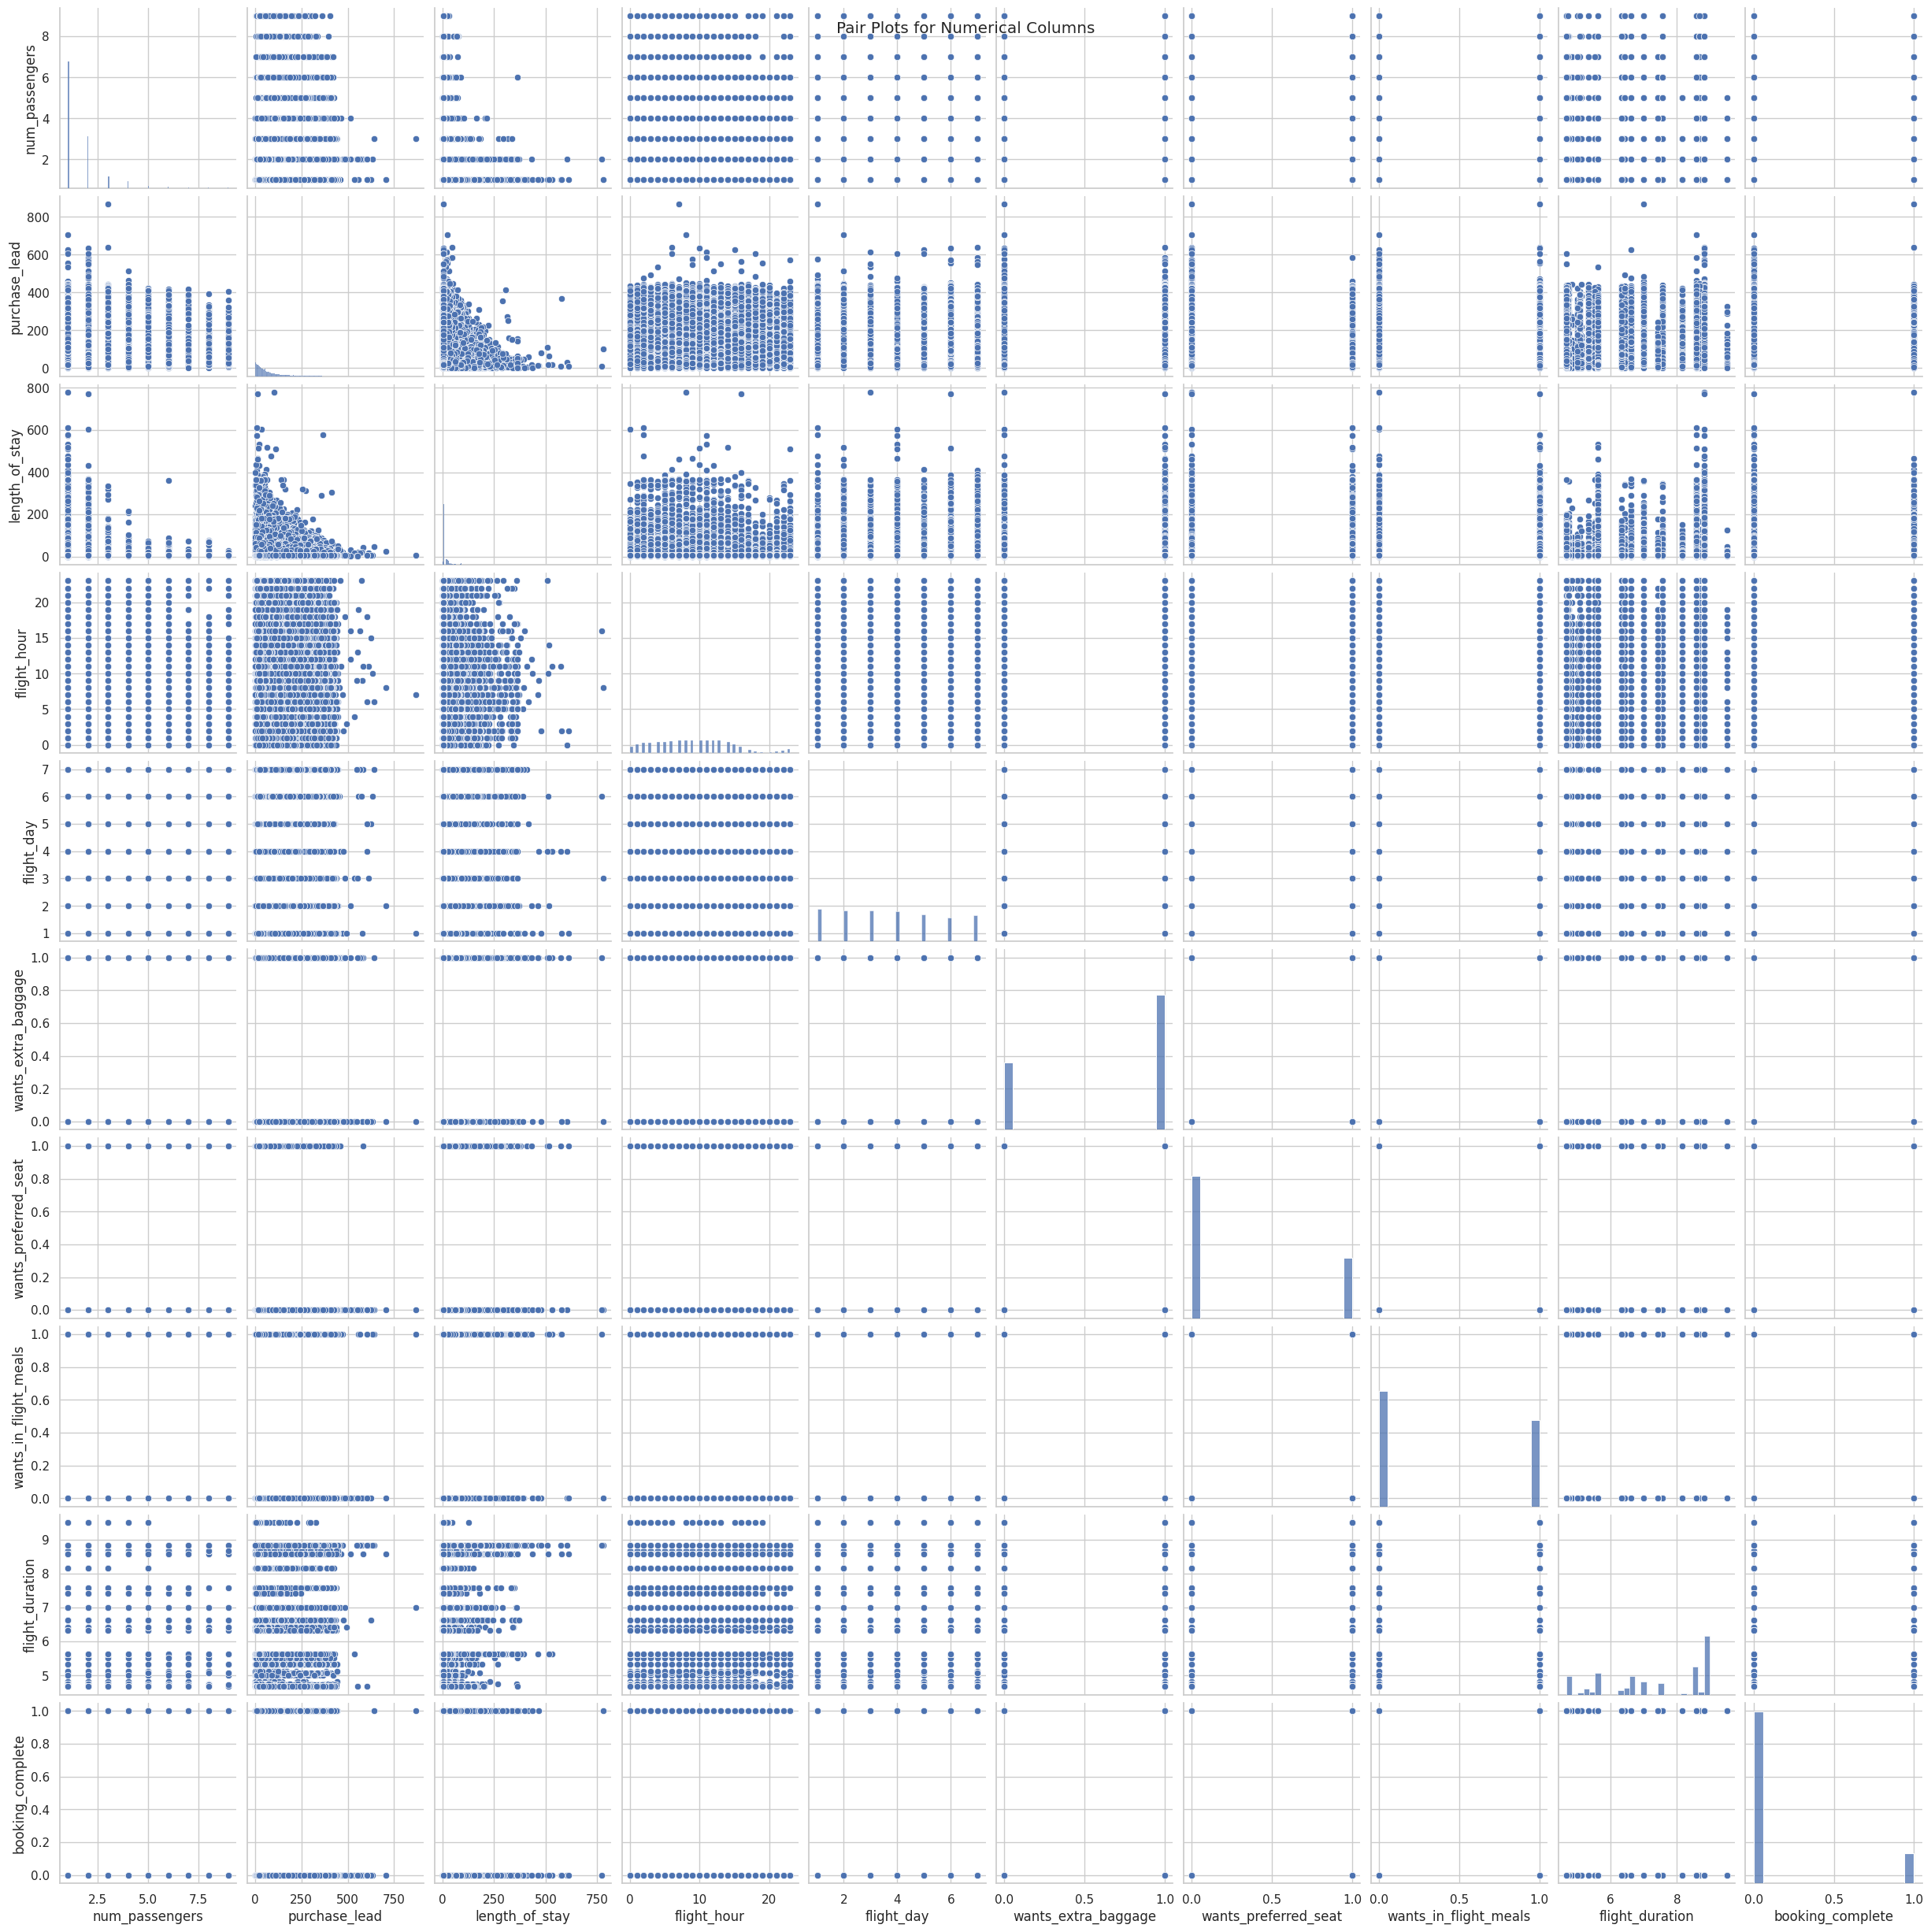

In [ ]:
# Plot pair plots for numerical columns
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair Plots for Numerical Columns")
plt.show()


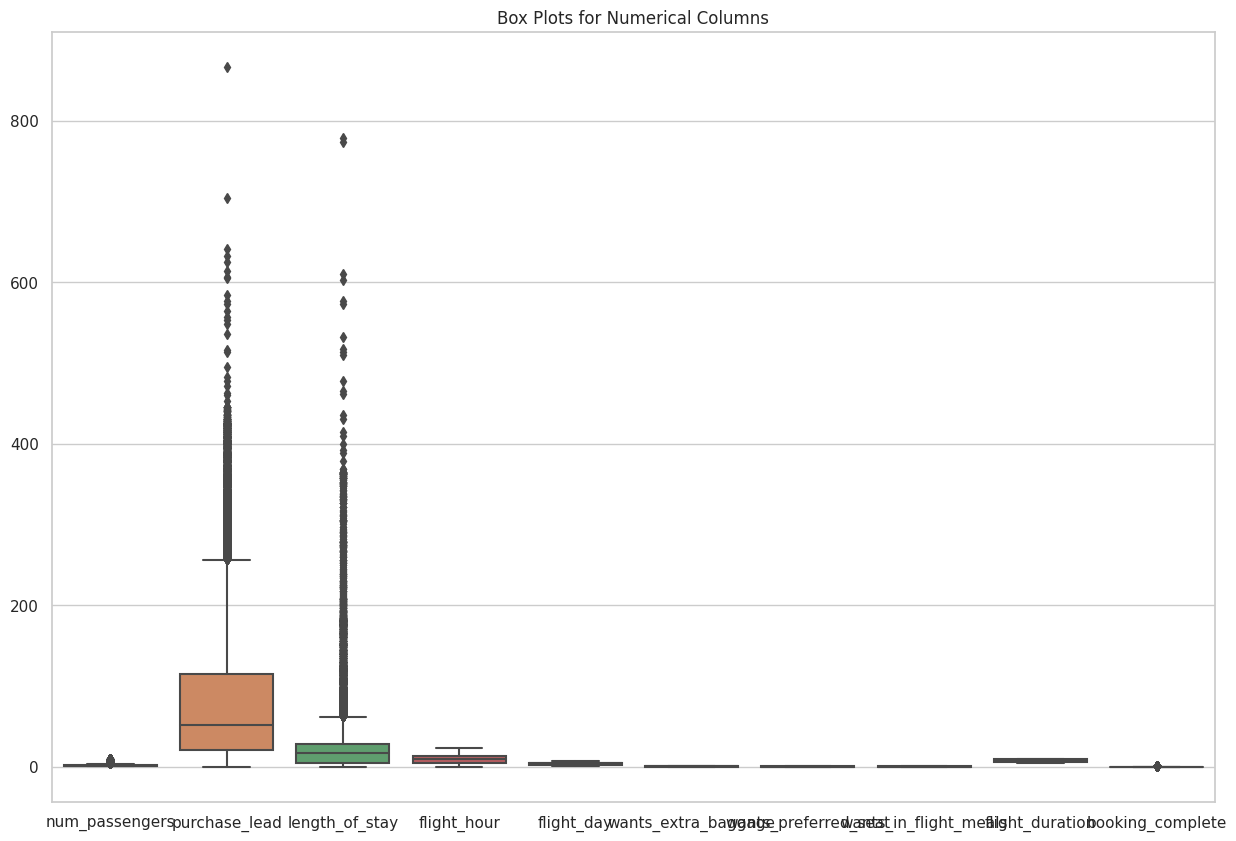

In [ ]:
# Plot box plots for numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns])
plt.title("Box Plots for Numerical Columns")
plt.show()


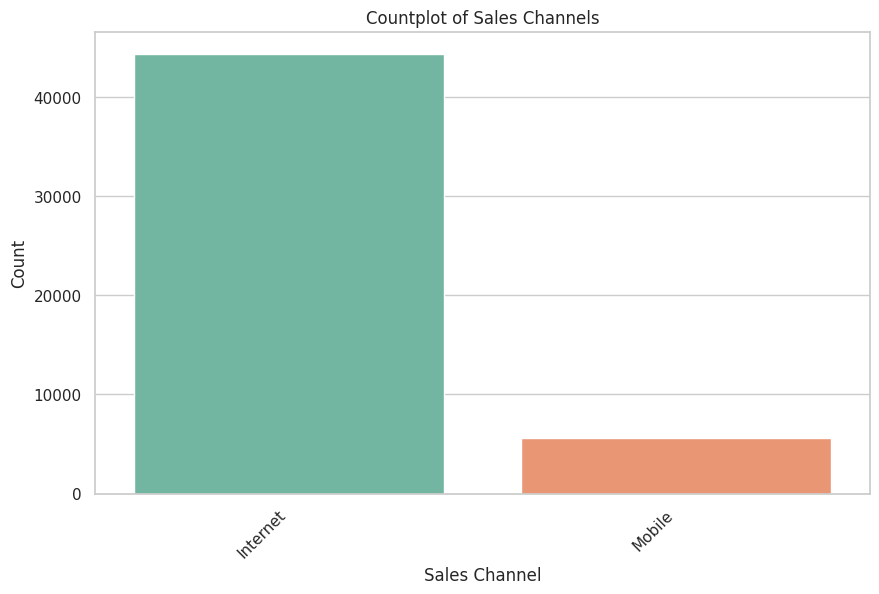

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use a color palette for better distinction
color_palette = sns.color_palette("Set2")  # You can choose a different palette

# Create the countplot
sns.countplot(data=df, x='sales_channel', palette=color_palette)

# Improve x-axis label readability by rotating them
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed

# Set plot title and labels
plt.title('Countplot of Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

categorical_columns = ['sales_channel', 'trip_type', 'route', 'booking_origin']

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Considering all columns except 'booking_complete' as features
features = df.drop('booking_complete', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, df['booking_complete'], test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Model Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Accuracy: 0.8541

Confusion Matrix:
[[8384  136]
 [1323  157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.54      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000



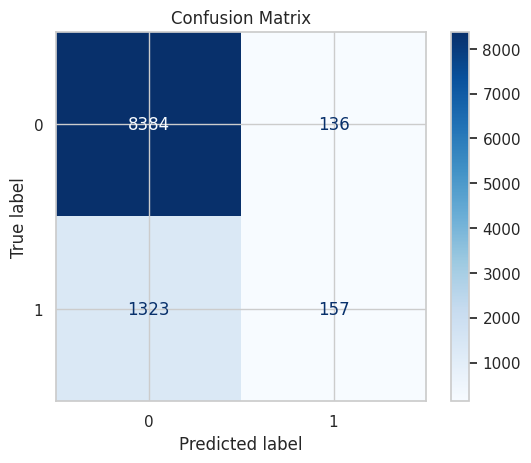

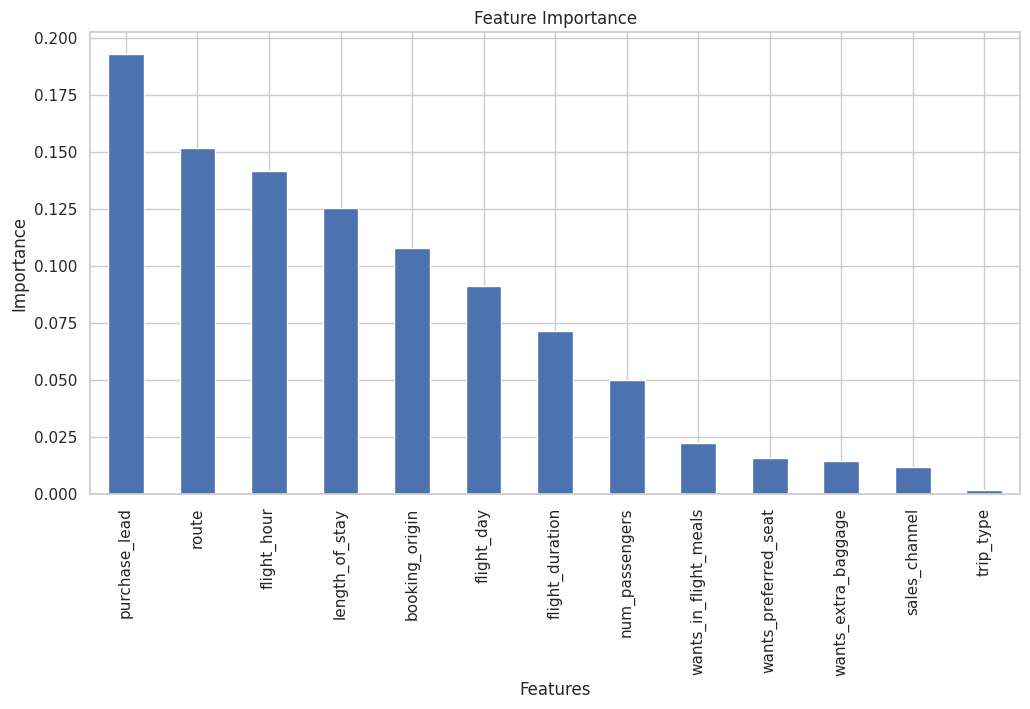

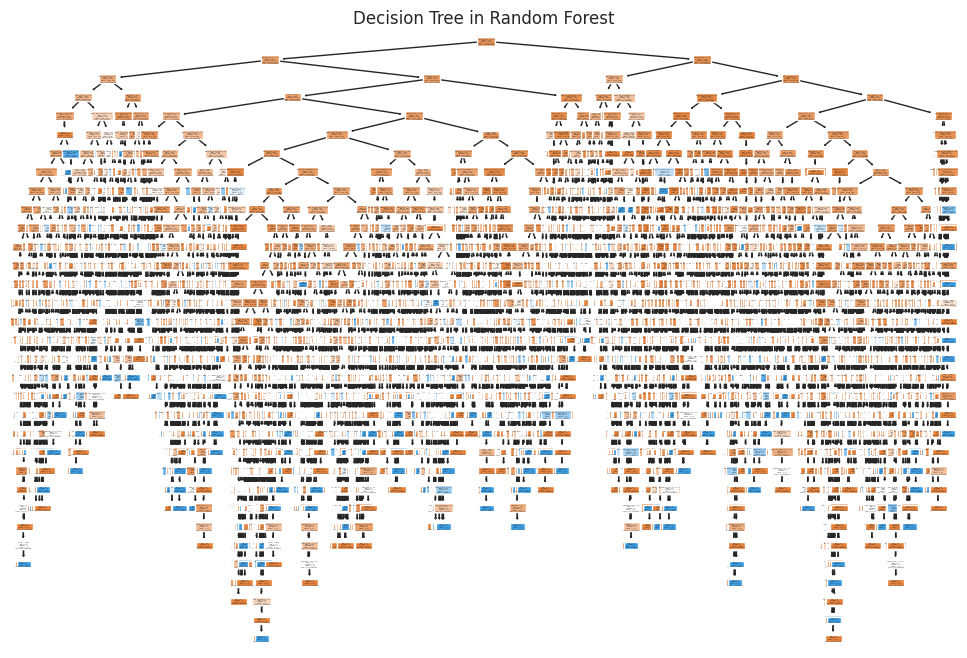

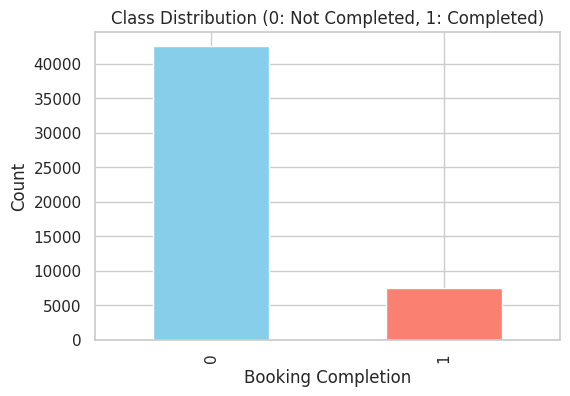

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Visualize Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)
sorted_feature_importances.plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Plot the first decision tree in the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], feature_names=features.columns, class_names=["Not Completed", "Completed"], filled=True)
plt.title("Decision Tree in Random Forest")
plt.show()

# Class Distribution Plot
df['booking_complete'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], figsize=(6, 4))
plt.title("Class Distribution (0: Not Completed, 1: Completed)")
plt.xlabel("Booking Completion")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = df.drop(['booking_complete', 'sales_channel', 'trip_type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, df['booking_complete'], test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Model Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Accuracy: 0.8534

Confusion Matrix:
[[8378  142]
 [1324  156]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.52      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.54      0.55     10000
weighted avg       0.81      0.85      0.81     10000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(features, df['booking_complete'], test_size=0.2, random_state=42)

rf_model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_weighted.fit(X_train, y_train)

y_pred_weighted = rf_model_weighted.predict(X_test)

# Evaluate the model
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)

# Display the results
print(f"Model Accuracy (Class Weighting): {accuracy_weighted}")
print("\nConfusion Matrix:")
print(conf_matrix_weighted)
print("\nClassification Report:")
print(class_report_weighted)


Model Accuracy (Class Weighting): 0.8541

Confusion Matrix:
[[8393  127]
 [1332  148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.54      0.10      0.17      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(features, df['booking_complete'], test_size=0.2, random_state=42)

svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Display the results
print(f"Model Accuracy (SVM): {accuracy_svm}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)


Model Accuracy (SVM): 0.5162

Confusion Matrix:
[[4009 4511]
 [ 327 1153]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.47      0.62      8520
           1       0.20      0.78      0.32      1480

    accuracy                           0.52     10000
   macro avg       0.56      0.62      0.47     10000
weighted avg       0.82      0.52      0.58     10000



Balanced Random Forest Accuracy: 0.8541

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.54      0.10      0.17      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000



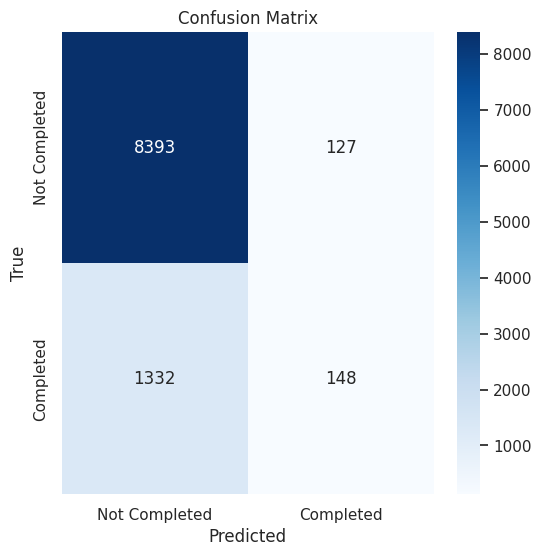

SVM Accuracy: 0.5162

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.47      0.62      8520
           1       0.20      0.78      0.32      1480

    accuracy                           0.52     10000
   macro avg       0.56      0.62      0.47     10000
weighted avg       0.82      0.52      0.58     10000



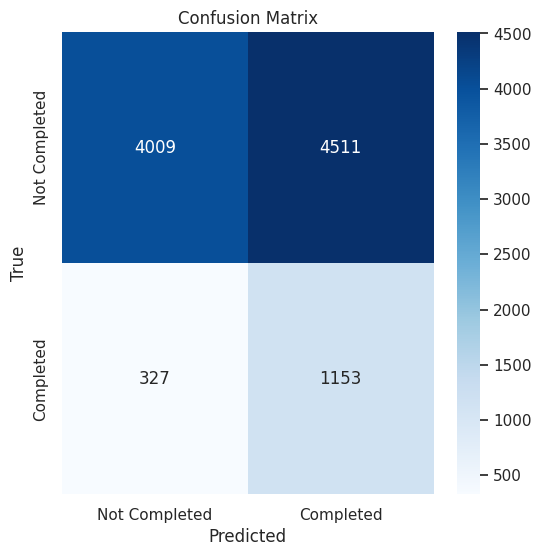

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to evaluate and visualize the model performance
def evaluate_and_visualize(model, X_test, y_test, model_name, classes):

    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Display the results
    print(f"{model_name} Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(class_report)

    # Plot Confusion Matrix
    plot_conf_matrix(y_test, y_pred, classes)

# Define classes for confusion matrix
classes = ['Not Completed', 'Completed']

# Visualize the performance of Balanced Random Forest
evaluate_and_visualize(rf_model_weighted, X_test, y_test, "Balanced Random Forest", classes)

# Visualize the performance of SVM
evaluate_and_visualize(svm_model, X_test, y_test, "SVM", classes)
